# Problem Set 3

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread

## 1. Matrix Multiplication

### 1.

See picture

### 2.

In [5]:
A = np.array([[0,7], [5,3]])
B = np.array([[1,0], [0,-1]])
A@B

array([[ 0, -7],
       [ 5, -3]])

In [6]:
C = np.array([[1,0], [0,-1], [0,1]])
A@C

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [7]:
D = np.array([[1,0, 0], [0, -1, 1]])
A@D

array([[ 0, -7,  7],
       [ 5, -3,  3]])

## 2. Rotate Crazy Hat

### 1.

In [8]:
ch = pd.read_csv("../data/crazy-hat.tsv", sep='\t')
ch.head()

,x,y,group
0,0,22,outline
1,16,-18,outline
2,-16,-18,outline
3,0,22,outline
4,-3,7,leye


### 2.

In [9]:
x = ch[['x']].to_numpy()
y = ch[['y']].to_numpy()
group = ch[['group']].to_numpy()
xy = np.concatenate((x, y), axis=1)

### 3.

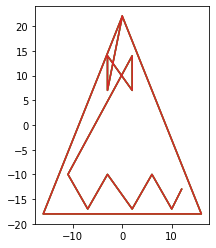

In [29]:
ax = plt.axes()
ax.set_aspect('equal')
for i in np.unique(group):
    ax.plot(xy[:,0], xy[:,1])

### 4.

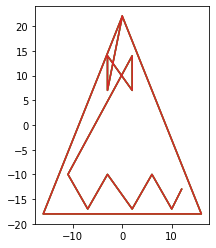

In [82]:
def plot(X, groups):
    ax = plt.axes()
    ax.set_aspect('equal')
    for i in np.unique(groups):
        ax.plot(X[:,0], X[:,1])
plot(xy, group)

### 5.

In [88]:
def R(alpha):
    a = alpha*np.pi/180 # Radian to degree
    ca = np.cos(a)
    sa = np.sin(a)
    r = np.array([[ca,-sa],[sa,ca]])
    return r

### 6.

In [56]:
xy @ R(45)

array([[ 15.55634919,  15.55634919],
       [ -1.41421356, -24.04163056],
       [-24.04163056,  -1.41421356],
       [ 15.55634919,  15.55634919],
       [  2.82842712,   7.07106781],
       [  7.77817459,  12.02081528],
       [  6.36396103,   3.53553391],
       [ 11.3137085 ,   8.48528137],
       [-14.8492424 ,   0.70710678],
       [-16.97056275,  -7.07106781],
       [ -9.19238816,  -4.94974747],
       [-10.60660172, -13.43502884],
       [ -2.82842712, -11.3137085 ],
       [ -4.94974747, -19.09188309],
       [ -0.70710678, -17.67766953]])

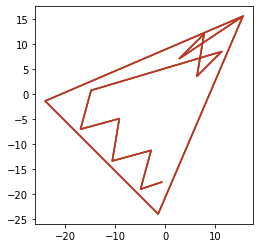

In [68]:
plot(xy @ R(45), group)

In [83]:
xy @ R(90)

array([[ 2.20000000e+01,  1.34711148e-15],
       [-1.80000000e+01, -1.60000000e+01],
       [-1.80000000e+01,  1.60000000e+01],
       [ 2.20000000e+01,  1.34711148e-15],
       [ 7.00000000e+00,  3.00000000e+00],
       [ 1.40000000e+01,  3.00000000e+00],
       [ 7.00000000e+00, -2.00000000e+00],
       [ 1.40000000e+01, -2.00000000e+00],
       [-1.00000000e+01,  1.10000000e+01],
       [-1.70000000e+01,  7.00000000e+00],
       [-1.00000000e+01,  3.00000000e+00],
       [-1.70000000e+01, -2.00000000e+00],
       [-1.00000000e+01, -6.00000000e+00],
       [-1.70000000e+01, -1.00000000e+01],
       [-1.30000000e+01, -1.20000000e+01]])

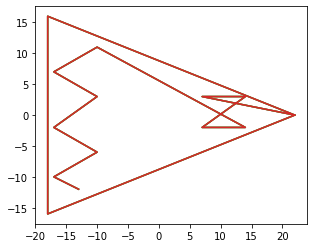

In [84]:
plot(xy @ R(90), group)

## 3.1 Linear Transformation of Images
### 1.

In [65]:
a = np.array([[0,0], [0,2], [1,1]])
fx = np.array([[-1,0], [0,1]])
a @ fx

array([[ 0,  0],
       [ 0,  2],
       [-1,  1]])

### 2.

Should be 2x2 to gett the same dimension matrix as we started, which is the first step in being able to flip the matrix.

### 3.

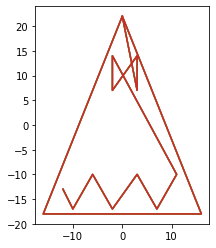

In [63]:
plot(xy @ fx, group)

## 3.2 Stretch Image

### 1.

In [66]:
s = np.array([[1,0], [0,2]])
a @ s

array([[0, 0],
       [0, 4],
       [1, 2]])

### 2.

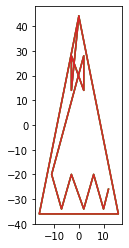

In [67]:
plot(xy @ s, group)

### 3.

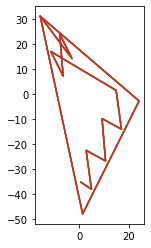

In [70]:
plot(((xy @ R(45)) @ s) @ fx, group)

## 4. Krazy Kat

shape: (432, 482)


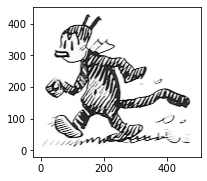

In [91]:
img = imread('../data/krazy-kat.png')
# note: rows * columns (not width * height!)
print("shape:", img.shape)
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(img.shape[1]),
                     np.arange(img.shape[0], 0, -1))
X = np.column_stack((xx.ravel(), yy.ravel()))
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=img.ravel(), marker='.',
            cmap="Greys_r")
ax.set_aspect('equal')
plt.show()

### 1.

In [77]:
print(X)

[[  0 432]
 [  1 432]
 [  2 432]
 ...
 [479   1]
 [480   1]
 [481   1]]


432 Rows, meaning 432 pixels wide. The lines in the matrix denote where the pixels will be filled on the coordinate plane. The 3 values represent color and depth.

### 2.

shape: (432, 482)


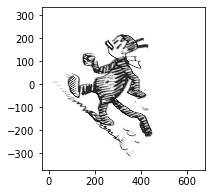

In [93]:
img = imread('../data/krazy-kat.png')
# note: rows * columns (not width * height!)
print("shape:", img.shape)
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(img.shape[1]),
                     np.arange(img.shape[0], 0, -1))
X = np.column_stack((xx.ravel(), yy.ravel()))
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X@R(45)[:,0], X@R(45)[:,1], c=img.ravel(), marker='.',
            cmap="Greys_r")
ax.set_aspect('equal')
plt.show()

shape: (432, 482)


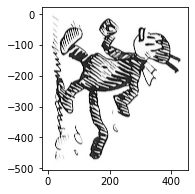

In [94]:
img = imread('../data/krazy-kat.png')
# note: rows * columns (not width * height!)
print("shape:", img.shape)
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(img.shape[1]),
                     np.arange(img.shape[0], 0, -1))
X = np.column_stack((xx.ravel(), yy.ravel()))
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X@R(90)[:,0], X@R(90)[:,1], c=img.ravel(), marker='.',
            cmap="Greys_r")
ax.set_aspect('equal')
plt.show()

shape: (432, 482)


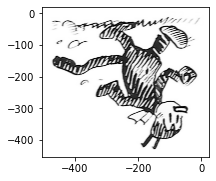

In [95]:
img = imread('../data/krazy-kat.png')
# note: rows * columns (not width * height!)
print("shape:", img.shape)
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(img.shape[1]),
                     np.arange(img.shape[0], 0, -1))
X = np.column_stack((xx.ravel(), yy.ravel()))
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X@R(180)[:,0], X@R(180)[:,1], c=img.ravel(), marker='.',
            cmap="Greys_r")
ax.set_aspect('equal')
plt.show()

### 3.

shape: (432, 482)


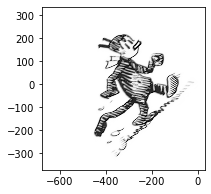

In [96]:
img = imread('../data/krazy-kat.png')
# note: rows * columns (not width * height!)
print("shape:", img.shape)
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(img.shape[1]),
                     np.arange(img.shape[0], 0, -1))
X = np.column_stack((xx.ravel(), yy.ravel()))
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(((X@R(45)) @ fx)[:,0], ((X@R(45)) @ fx)[:,1], c=img.ravel(), marker='.',
            cmap="Greys_r")
ax.set_aspect('equal')
plt.show()

shape: (432, 482)


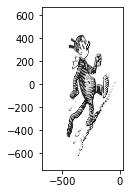

In [97]:
img = imread('../data/krazy-kat.png')
# note: rows * columns (not width * height!)
print("shape:", img.shape)
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(img.shape[1]),
                     np.arange(img.shape[0], 0, -1))
X = np.column_stack((xx.ravel(), yy.ravel()))
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter((((X@R(45)) @ fx) @ s)[:,0], (((X@R(45)) @ fx) @ s)[:,1], c=img.ravel(), marker='.',
            cmap="Greys_r")
ax.set_aspect('equal')
plt.show()

### 5.

### 1.

In [100]:
boston = pd.read_csv('../data/boston (1).csv.bz2', sep = '\t')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 2.

In [142]:
import statsmodels.formula.api as smf
m = smf.ols("crim ~ medv + rm + lstat + zn", data = boston).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     37.30
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           2.56e-27
Time:                        07:43:47   Log-Likelihood:                -1740.4
No. Observations:                 506   AIC:                             3491.
Df Residuals:                     501   BIC:                             3512.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.9283      4.343     -2.746      0.006     -20.462      -3.395
medv          -0.1948      0.061     -3.187      0.002      -0.315      -0.075
rm             2.1947      0.684      3.210      0.001       0.851       3.538
lstat          0.4896      0.073      6.677      0.000       0.346       0.634
zn            -0.0050      0.016     -0.311      0.756      -0.036       0.026
==============================================================================
Omnibus:                      586.447   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42586.050
Skew:                           5.458   Prob(JB):                         0.00
Kurtosis:                      46.597   Cond. No.                         423.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3.

In [134]:
i = np.ones(boston[['medv']].values.shape)
X = np.concatenate((i, boston[['medv']].values, boston[['rm']].values, boston[['lstat']].values, boston[['zn']].values), axis=1)

### 4.

In [132]:
y = boston[['medv']].values
y.shape

(506, 1)

### 5.

In [139]:
print(np.linalg.inv(X.T@X))

[[ 3.28292983e-01  9.49490214e-05 -4.57560526e-02 -3.20508232e-03
  -3.00956166e-05]
 [ 9.49490214e-05  6.50078697e-05 -3.28000007e-04  4.05655903e-05
  -1.02763025e-06]
 [-4.57560526e-02 -3.28000007e-04  8.13381985e-03  1.68040023e-04
  -8.57927200e-06]
 [-3.20508232e-03  4.05655903e-05  1.68040023e-04  9.35714964e-05
   4.48708199e-06]
 [-3.00956166e-05 -1.02763025e-06 -8.57927200e-06  4.48708199e-06
   4.43460737e-06]]


## This PS took me 8 hours.